In [14]:
import math, random
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import Markdown, clear_output
import ipywidgets as widgets
%matplotlib inline
%matplotlib widget
plt.rcParams['font.size'] = 14

# EOQ Formula
D = 5000
S = 10
H = 0.3 + random.uniform(0,1)
Q = math.sqrt((2*D*S)/H)

# Mean demand rate and standard deviation
d = 100
sigma = 2

# Cost analysis
T = math.ceil(D/Q)
RP = math.ceil(Q/d)
numberOfCycles = int(T*RP)
AOC = (T*S)
AHC = ((Q/2)*H)
ATC = AOC + AHC

# Starting values
L = 2
currentInventory =  500.0
previousInventory =  501.0

# Trackers and plotters
tracker = 99999999
currentIteration = 0
inventoryLevel = []
reorderPoints = []
reorderPoint = 0
belowZero = []
isOrder = False
isZero = False

display(Markdown(f"Chosen annual demand **(D)** : **{D}**, chosen mean demand **(d)** rate : **{d}**"))
display(Markdown(f"Optimal Order Quantity **(Q)** : **{Q:.2f}**, total number of orders required **(T)** : **{T}**, **(D/Q)**"))
display(Markdown(f"The length of a replenishment cycle **(RP)** is : **{RP}**, **(Q/d)**"))
display(Markdown(f"Number of cycles required to fulfill the annual demand is : **{numberOfCycles}**, **(T x RP)**"))
display(Markdown(f"Fixed Ordering Cost **S** : **{S}**, Varible Holding Cost **H** : **{H:.2f}**, lead time **L** : **{L}**"))
display(Markdown(f"Annual Ordering Cost **(AOC)** : **{AOC:.2f}**"))
display(Markdown(f"Annual Holding Cost **(AHC)** : **{AHC:.2f}**"))
display(Markdown(f"Annual Total Cost **(ATC)** : **{ATC:.2f}**"))

Chosen annual demand **(D)** : **5000**, chosen mean demand **(d)** rate : **100**

Optimal Order Quantity **(Q)** : **435.19**, total number of orders required **(T)** : **12**, **(D/Q)**

The length of a replenishment cycle **(RP)** is : **5**, **(Q/d)**

Number of cycles required to fulfill the annual demand is : **60**, **(T x RP)**

Fixed Ordering Cost **S** : **10**, Varible Holding Cost **H** : **0.53**, lead time **L** : **2**

Annual Ordering Cost **(AOC)** : **120.00**

Annual Holding Cost **(AHC)** : **114.89**

Annual Total Cost **(ATC)** : **234.89**

In [17]:
for cycle in range(numberOfCycles):

    currentIteration = 0
    isOrder = False
    isZero = False
    previousInventory = currentInventory + 1
    
    while (currentInventory < previousInventory):
        randomDemand = d + sigma * np.random.randn(1)
        # print(randomDemand)
        inventoryLevel.append(currentInventory)
        previousInventory = currentInventory
        currentInventory -= randomDemand.item()
        # print(currentInventory)
        if currentInventory < 0 and not isZero:
            belowZero.append([len(inventoryLevel)-1, previousInventory])
            isZero = True
        if (currentInventory - (L * d) <= 1) and not isOrder:
            tracker = currentIteration
            reorderPoint = tracker
            reorderPoints.append([len(inventoryLevel), currentInventory])
            isOrder = True

        if (currentIteration == tracker + L):
            currentInventory += Q
            isOrder = False
        currentIteration += 1
    # break #Use to show reorder point and inventory level before going below zero
    
rpX = []
rpY = []
bzX = []
bzY = []
for x,y in reorderPoints:
    rpX.append(x)
    rpY.append(y)
for x,y in belowZero:
    bzX.append(x)
    bzY.append(y)


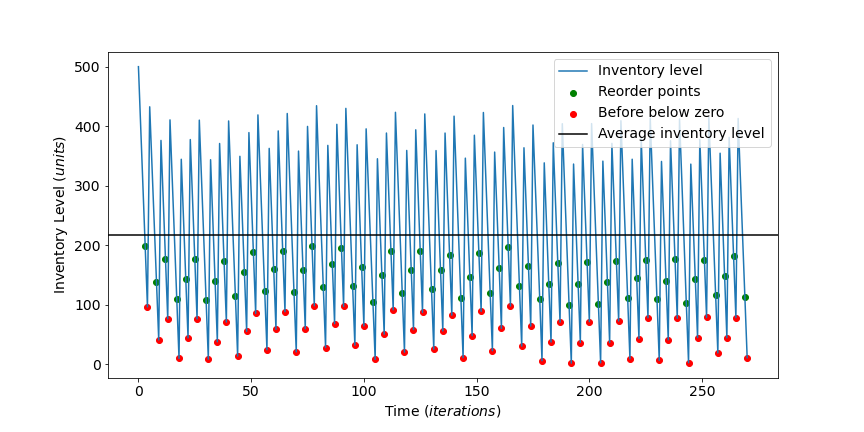

In [18]:
%matplotlib inline
%matplotlib widget
plt.close('all')
num = "EOQ trial"
fig,ax = plt.subplots(num=num, figsize = (12,6))
ax.plot(inventoryLevel, label ="Inventory level")
ax.scatter(rpX,rpY, marker = "o", color = "green", label = "Reorder points")
ax.scatter(bzX, bzY, marker = "o", color = "red", label = "Before below zero")
ax.set(xlabel = "Time $(iterations)$", ylabel = "Inventory Level $(units)$")
ax.axhline((Q/2), color = "black", label = "Average inventory level")
ax.legend(ncols);